In [89]:
import scipy.io

try:
    pmc = scipy.io.loadmat(r'C:\Program Files (x86)\Umram\ActionClusters Project\ActionClusters(mixed)\Analysis\Umur\1stlev1\1stlevel_SUB1\Clustering_PMC_volume_FINAL\actmean_betas.mat')
    print("Loaded actionbetasPMC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasPMC.mat:", e)

try:
    ppc = scipy.io.loadmat(r'C:\Program Files (x86)\Umram\ActionClusters Project\ActionClusters(mixed)\Analysis\Umur\1stlev1\1stlevel_SUB1\Clustering_PPC_volume_FINAL\actmean_betas.mat')
    print("Loaded actionbetasPPC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasPPC.mat:", e)

try:
    lotc = scipy.io.loadmat(r'C:\Program Files (x86)\Umram\ActionClusters Project\ActionClusters(mixed)\Analysis\Umur\1stlev1\1stlevel_SUB1\Clustering_LOTC_volume_FINAL\actmean_betas.mat')
    print("Loaded actionbetasLOTC.mat successfully.")
except Exception as e:
    print("Error loading actionbetasLOTC.mat:", e)

try:
    lotc = lotc['mean_betas']
    pmc = pmc['mean_betas']
    ppc = ppc['mean_betas']
    print("Accessed data in .mat files successfully.")
except Exception as e:
    print("Error accessing data in .mat files:", e)

Loaded actionbetasPMC.mat successfully.
Loaded actionbetasPPC.mat successfully.
Loaded actionbetasLOTC.mat successfully.
Accessed data in .mat files successfully.


In [90]:
#All in dataframes
import pandas as pd
import numpy as np

lotc = pd.DataFrame(lotc)
pmc = pd.DataFrame(pmc)
ppc = pd.DataFrame(ppc)


In [91]:
#Match matlab indexixng for dfs and rows
lotc.columns = lotc.columns + 1
pmc.columns = pmc.columns + 1
ppc.columns = ppc.columns + 1

lotc.index = lotc.index + 1
pmc.index = pmc.index + 1
ppc.index = ppc.index + 1

In [92]:
#Dissimilarity matrices for each region
from scipy.spatial.distance import pdist, squareform

lotc_dissim = pdist(lotc, metric='correlation')
pmc_dissim = pdist(pmc, metric='correlation')
ppc_dissim = pdist(ppc, metric='correlation')


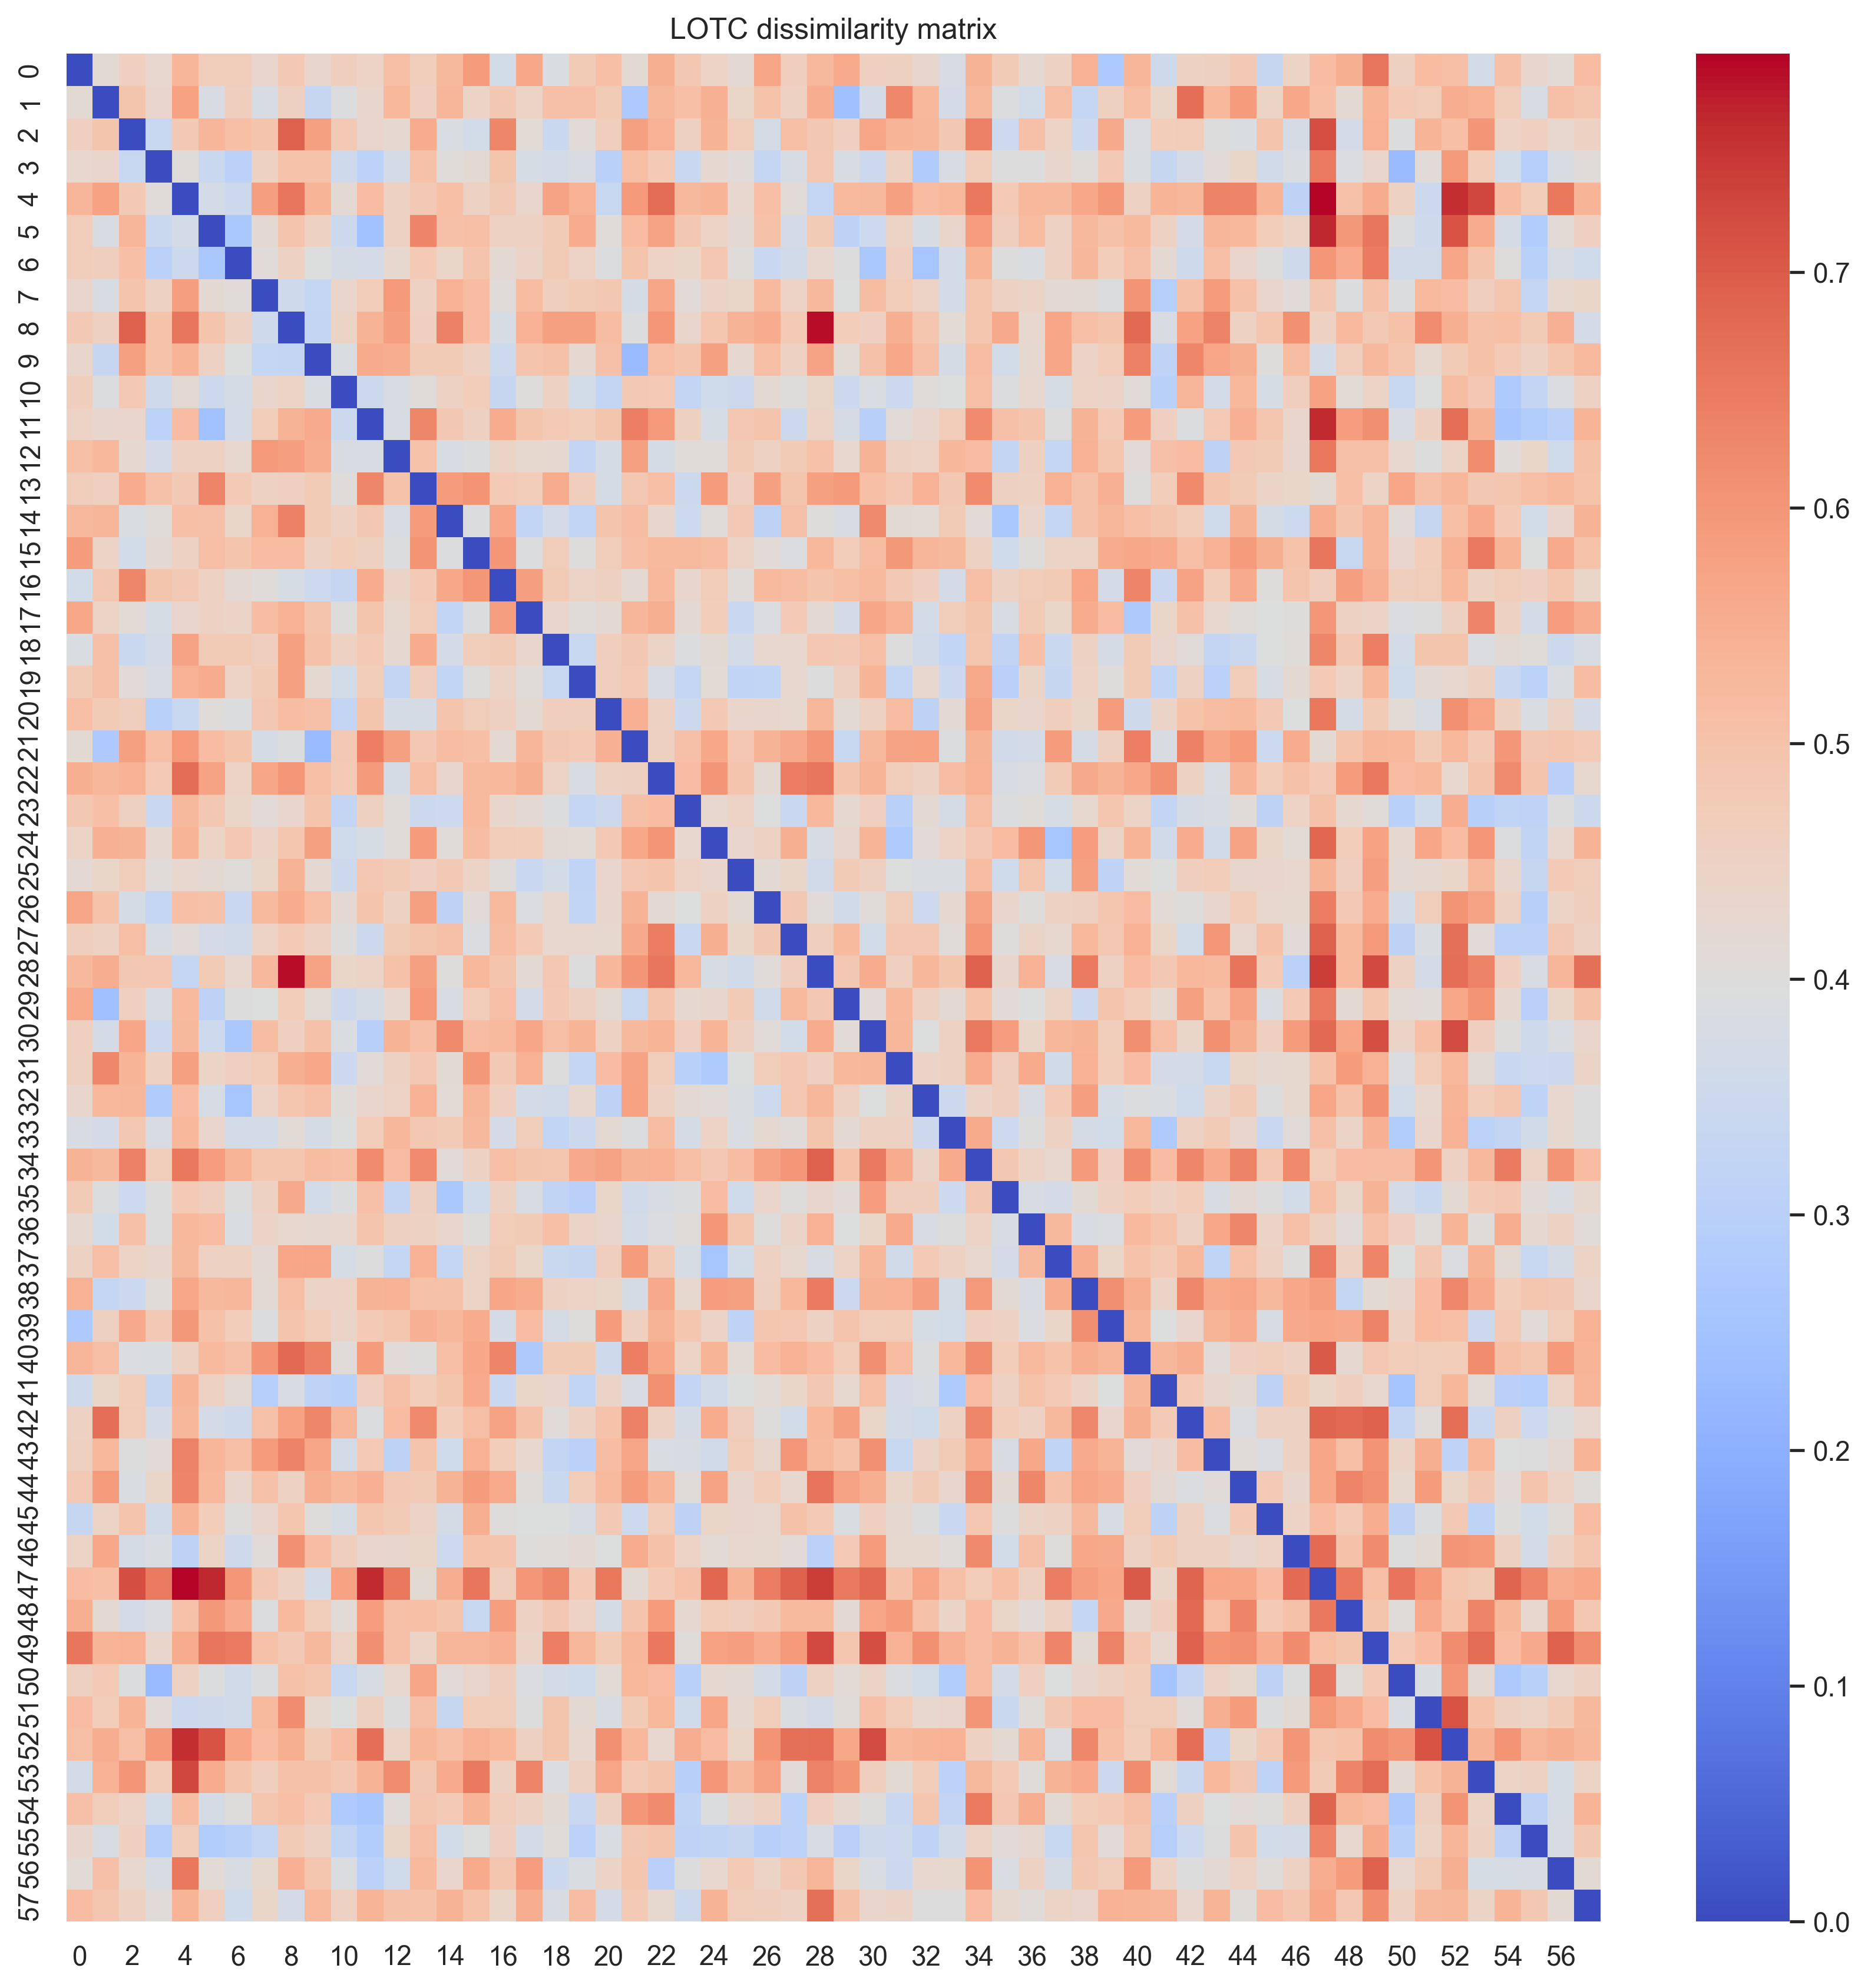

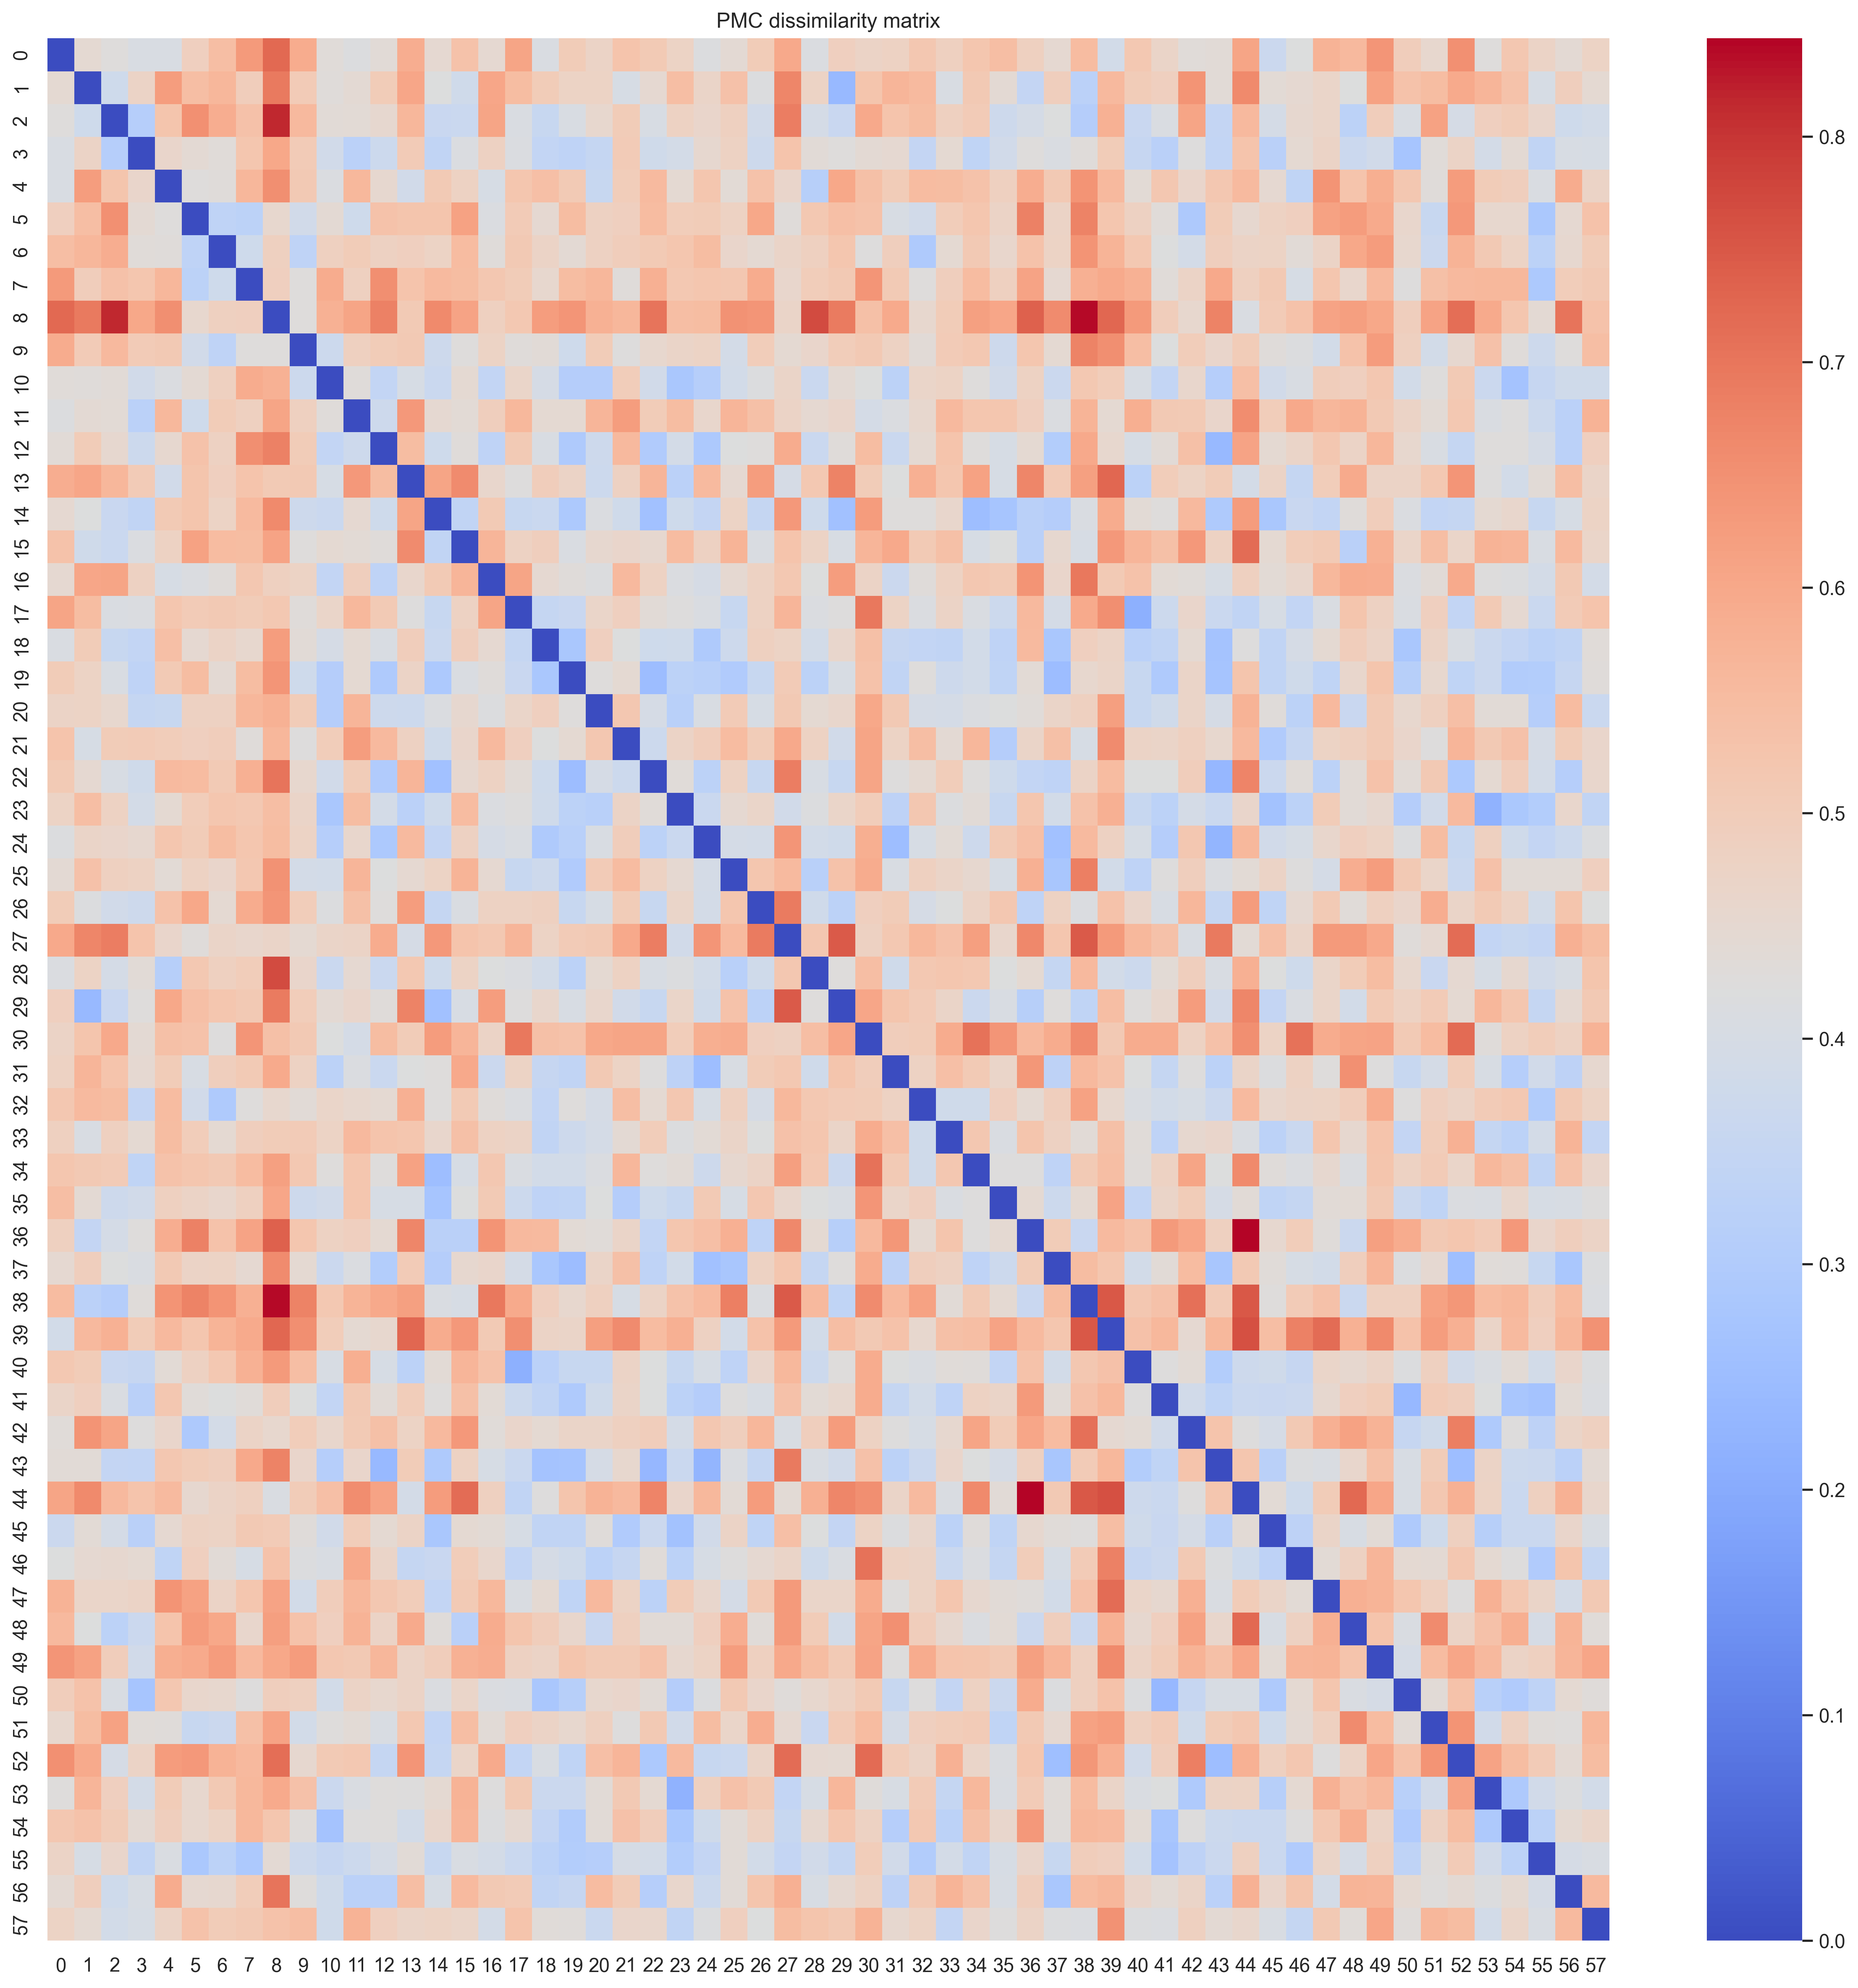

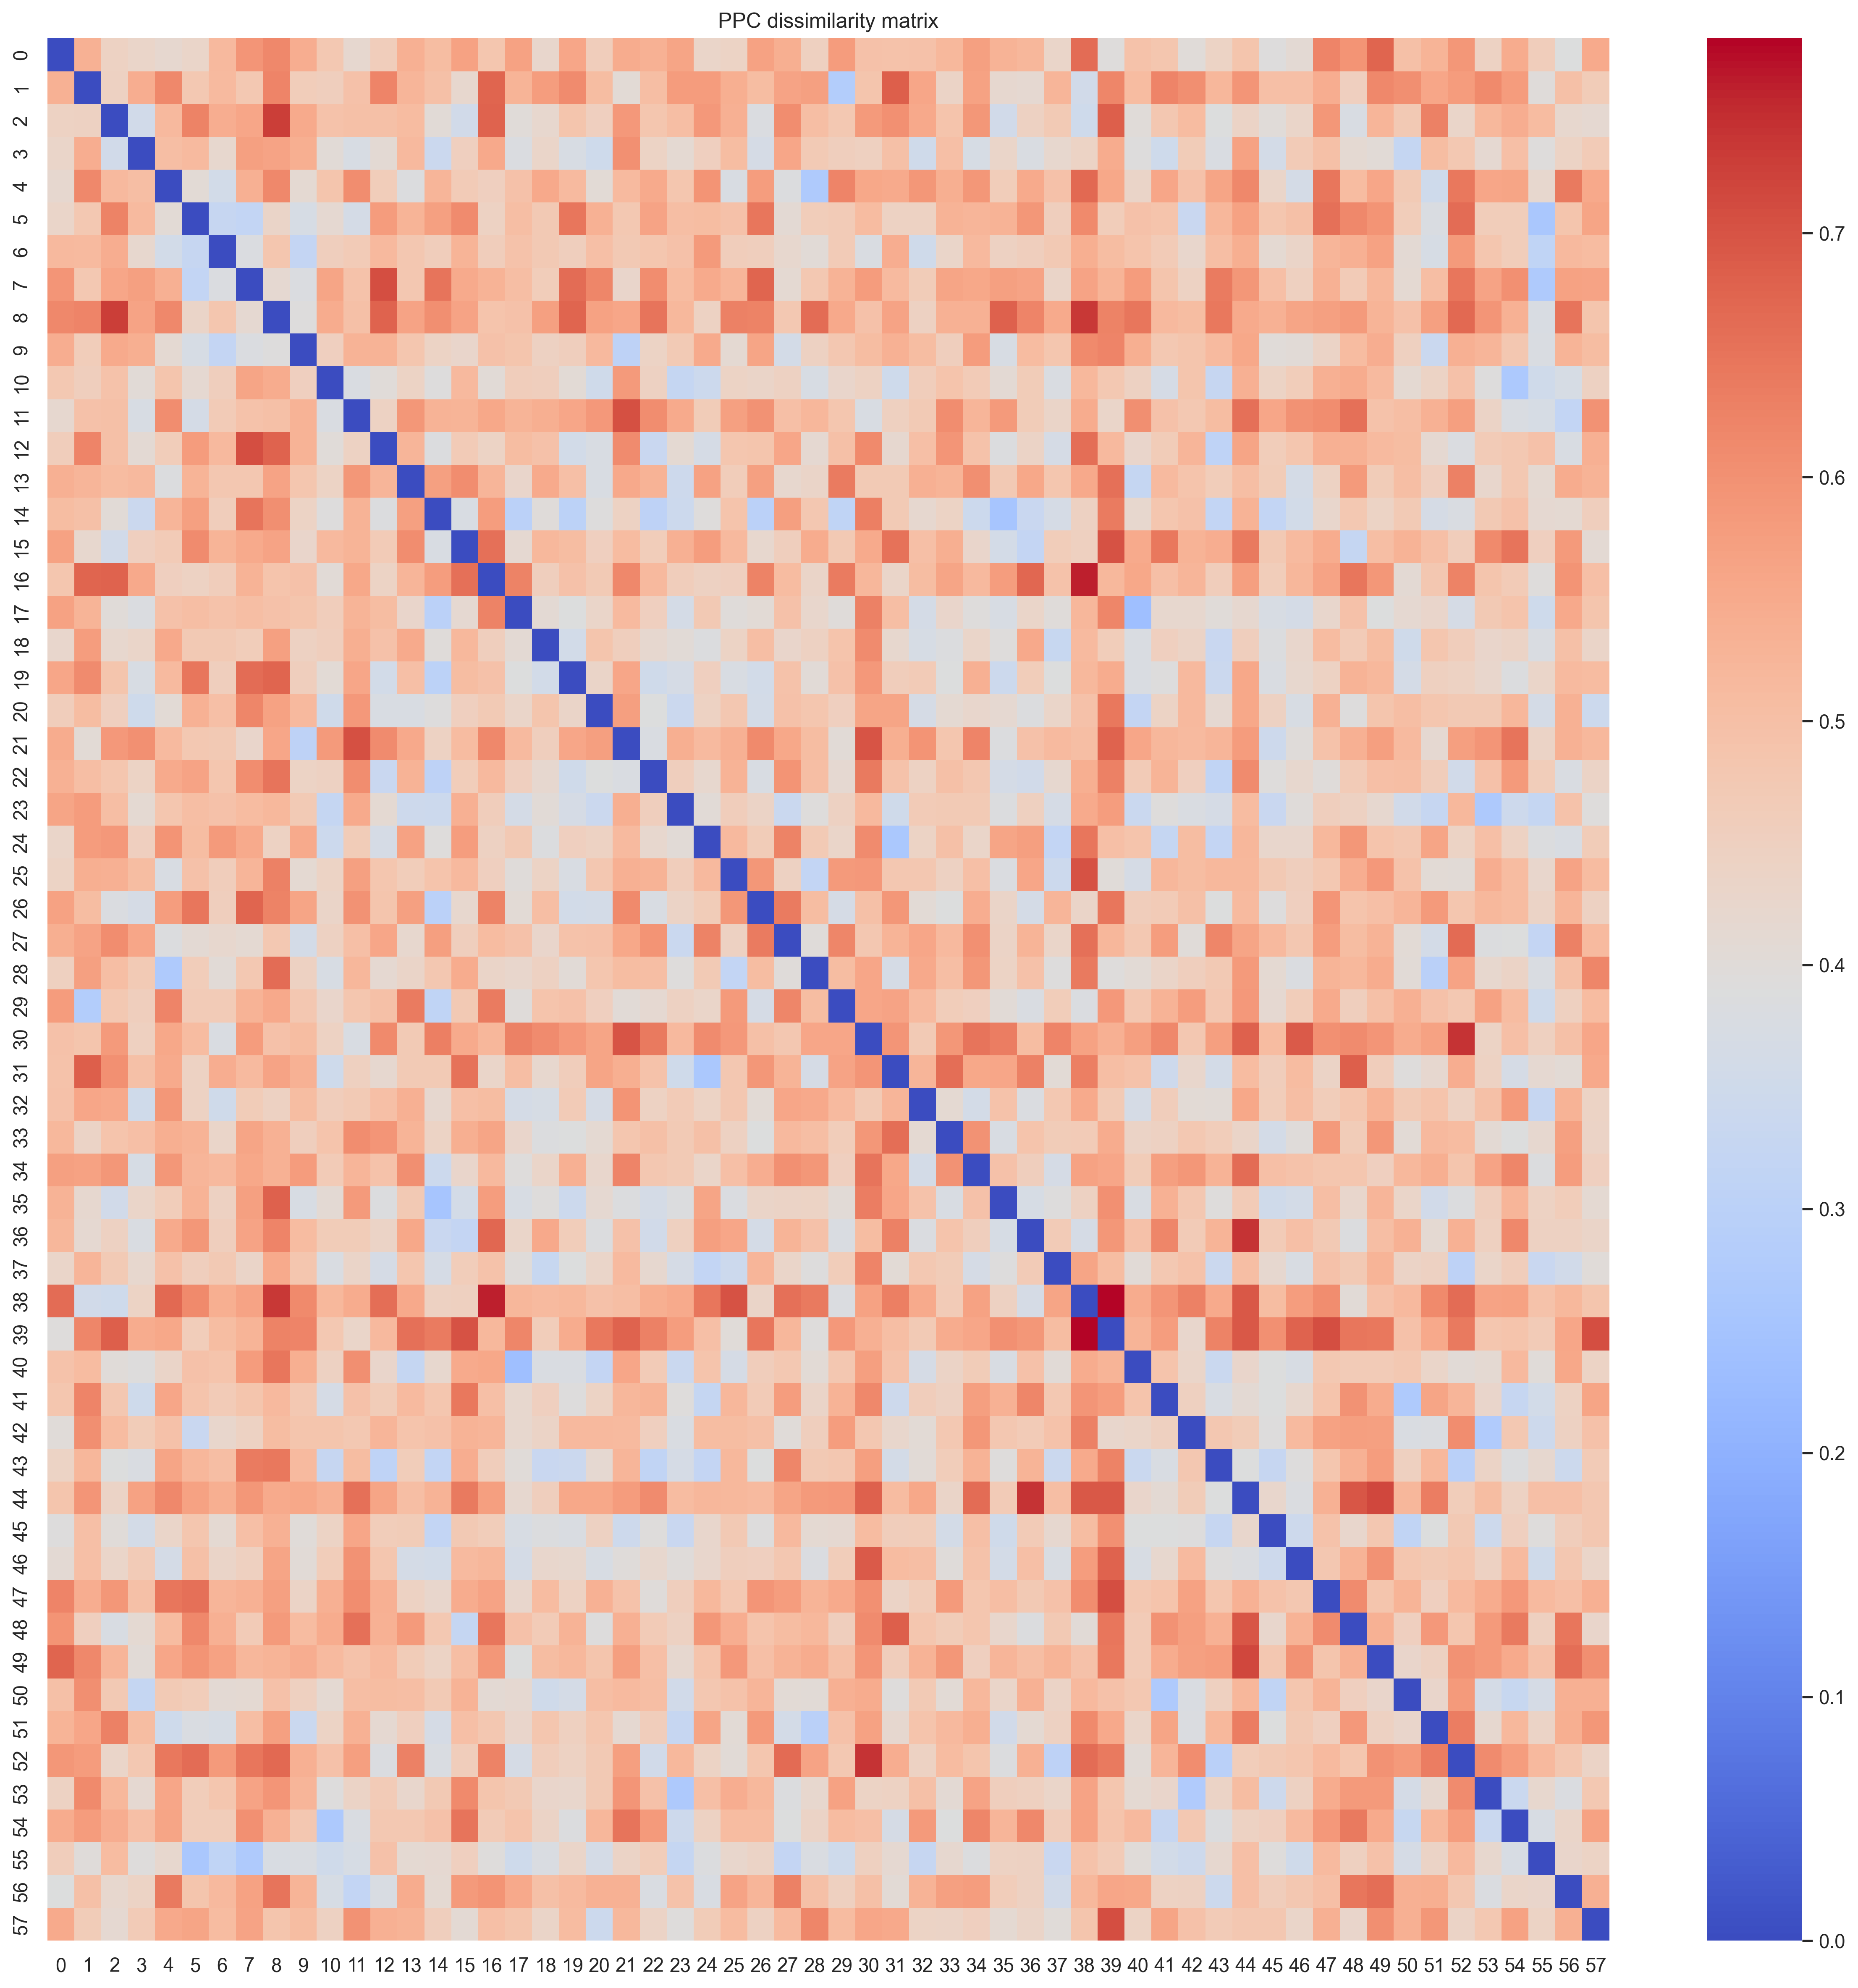

In [93]:
#Heatmaps for each region
import seaborn as sns
import matplotlib.pyplot as plt


#Bigger figures with bigger fonts and better resolution
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

plt.figure(figsize=(14, 14))
lotc_dissim = squareform(lotc_dissim)
pmc_dissim = squareform(pmc_dissim)
ppc_dissim = squareform(ppc_dissim)

sns.heatmap(lotc_dissim, cmap='coolwarm')
plt.title('LOTC dissimilarity matrix')
plt.show()

sns.heatmap(pmc_dissim, cmap='coolwarm')
plt.title('PMC dissimilarity matrix')
plt.show()

sns.heatmap(ppc_dissim, cmap='coolwarm')
plt.title('PPC dissimilarity matrix')
plt.show()

#make dissimliarity matrices dfs
lotc_dissim = pd.DataFrame(lotc_dissim)
pmc_dissim = pd.DataFrame(pmc_dissim)
ppc_dissim = pd.DataFrame(ppc_dissim)

#Increase indexes of dissimilarity matrices by 1
lotc_dissim.index = lotc_dissim.index + 1
pmc_dissim.index = pmc_dissim.index + 1
ppc_dissim.index = ppc_dissim.index + 1

lotc_dissim.columns = lotc_dissim.columns + 1
pmc_dissim.columns = pmc_dissim.columns + 1
ppc_dissim.columns = ppc_dissim.columns + 1

In [94]:
#indexes of dissimilarity matrices
ppc_dissim.index 

RangeIndex(start=1, stop=59, step=1)

In [95]:
mapping = {
    1: 2,
    2: 4,
    3: 5,
    4: 7,
    5: 8,
    6: 12,
    7: 13,
    8: 15,
    9: 16,
    10: 17,
    11: 20,
    12: 21,
    13: 22,
    14: 23,
    15: 24,
    16: 27,
    17: 28,
    18: 31,
    19: 35,
    20: 36,
    21:40,
    22:41,
    23:42,
    24:44,
    25:46,
    26:47,
    27:48,
    28:49,
    29:50,
    30:51,
    31:53,
    32:55,
    33:57,
    34:58,
    35:59,
    36:62,
    37:63,
    38:64,
    39:68,
    40:70,
    41:71,
    42:72,
    43:74,
    44:75,
    45:77,
    46:78,
    47:82, 
    48 :85, 
    49 :87, 
    50 :88, 
    51 :89, 
    52 :92, 
    53 :94, 
    54 :95, 
    55 :96, 
    56 :98, 
    57 :99, 
    58 :100
}


groups = [
    ('passive_inter', [4, 35, 58, 63, 89, 94]),
    ('active_inter', [36, 42, 47, 59, 75, 98]),
    ('comm_symbolic', [40, 51, 57]),
    ('comm_vocal', [2, 28, 85, 95]),
    ('manipulation', [7, 12, 13, 31, 50, 53, 96]),
    ('modify_substrate', [22, 44, 46, 64, 99]),
    ('digestion', [17, 21, 41, 72,88,92]),
    ('skin_displacement', [15, 16, 23, 70]),
    ('aim_in_space', [8, 20, 49, 71, 78, 87, 100]),
    ('locomotion_b', [55, 62, 68]),
    ('locomotion_q', [5,24,27,48,74, 77, 82])
]
def rename_and_reorder(dissim, mapping, groups):
    dissim.rename(index=mapping, columns=mapping, inplace=True)
    order = [index for group in groups for index in group[1]]
    dissim = dissim.reindex(order)
    dissim = dissim[order]
    return dissim

# Apply the function to each DSM
ppc_dissim = rename_and_reorder(ppc_dissim, mapping, groups)
lotc_dissim = rename_and_reorder(lotc_dissim, mapping, groups)
pmc_dissim = rename_and_reorder(pmc_dissim, mapping, groups)


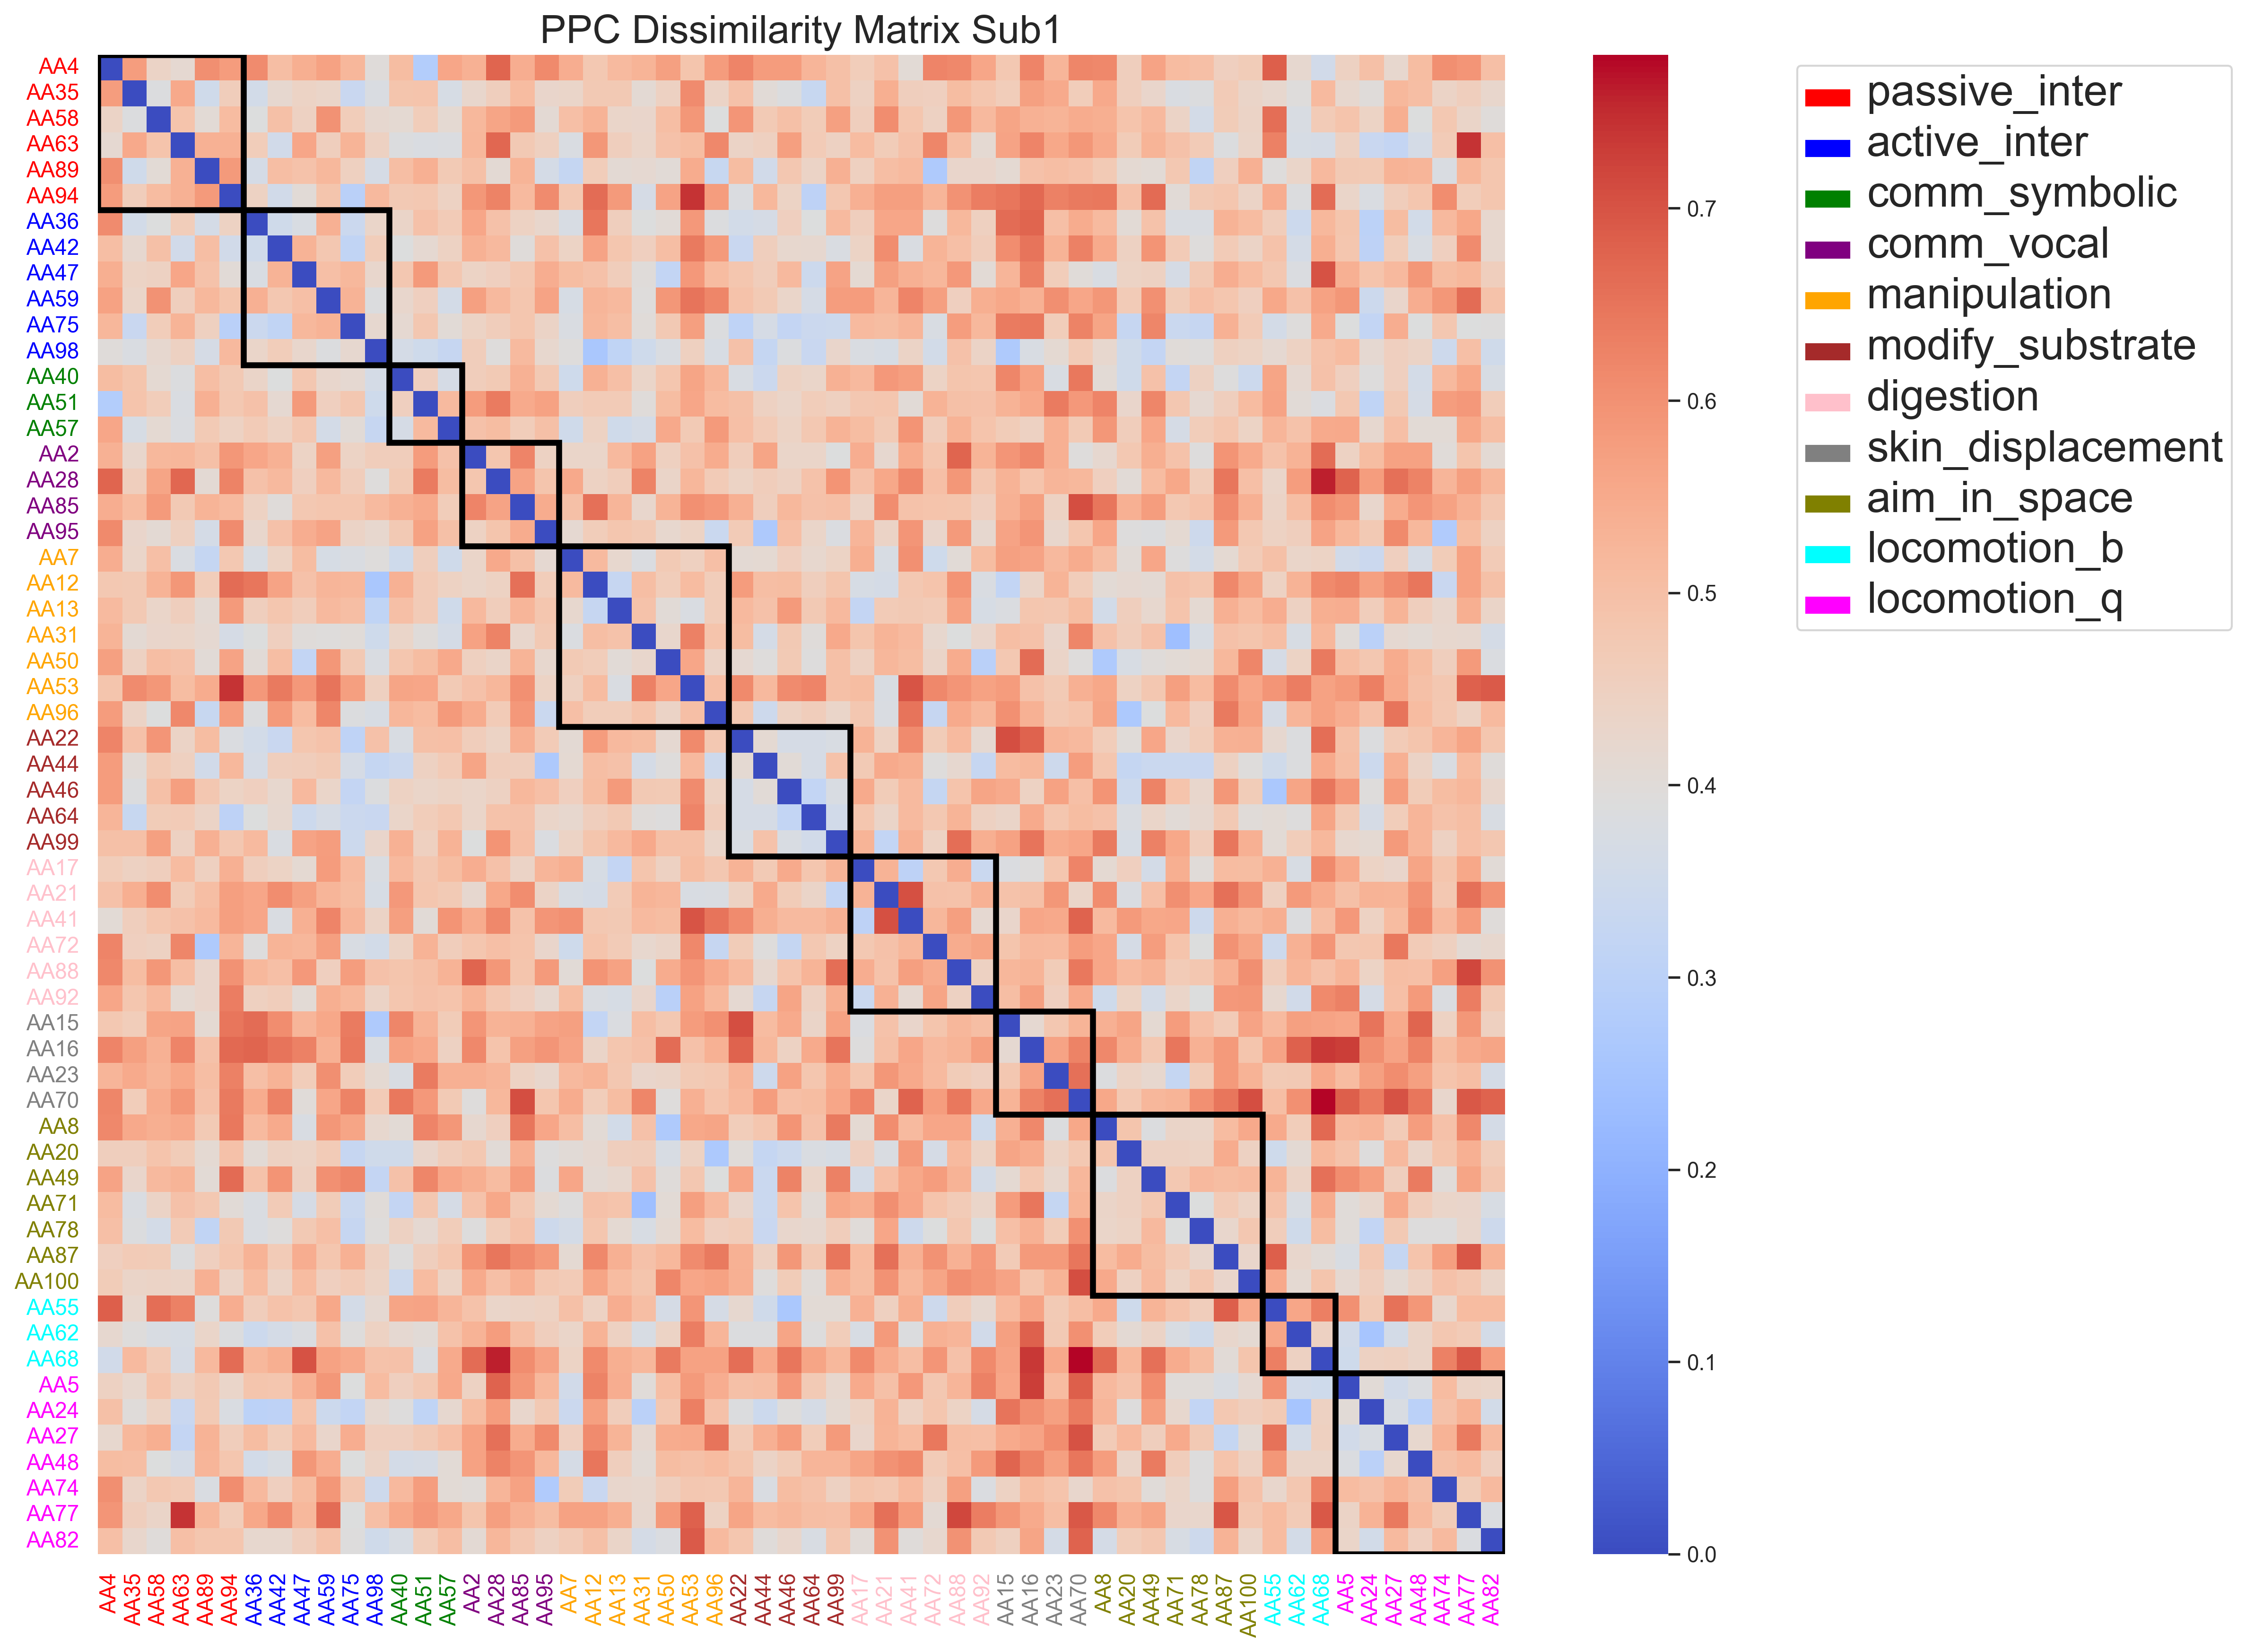

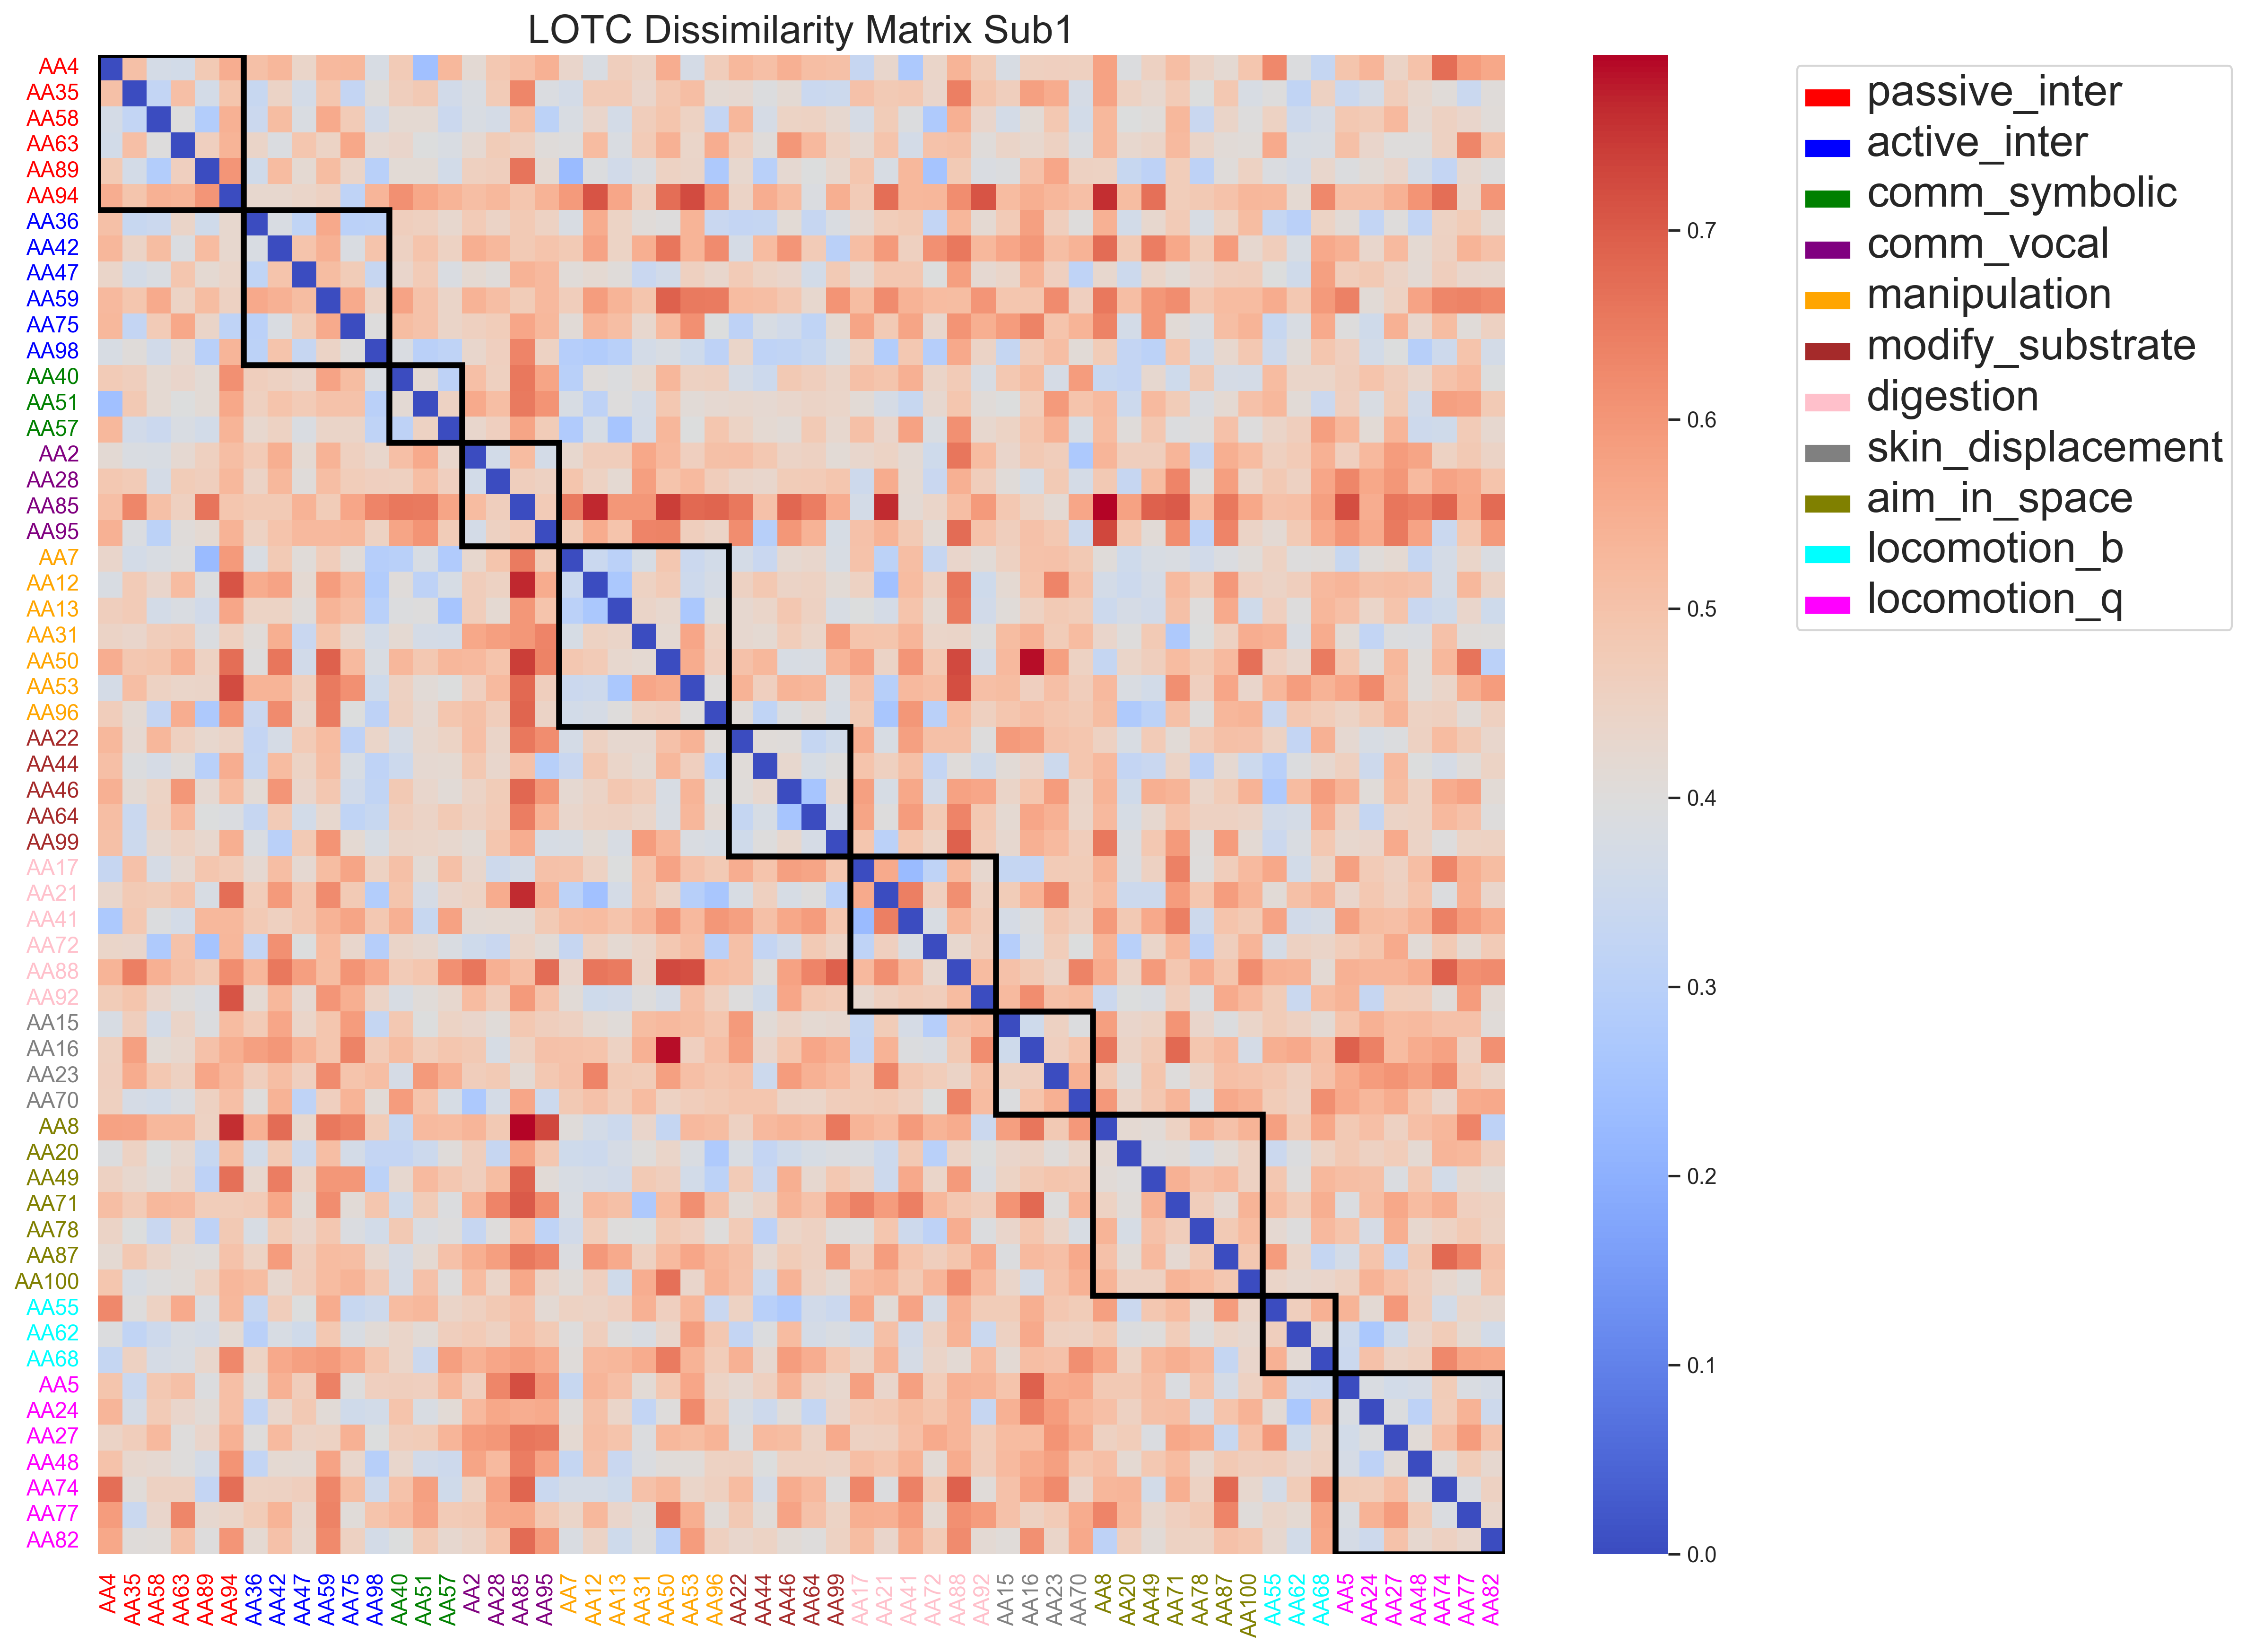

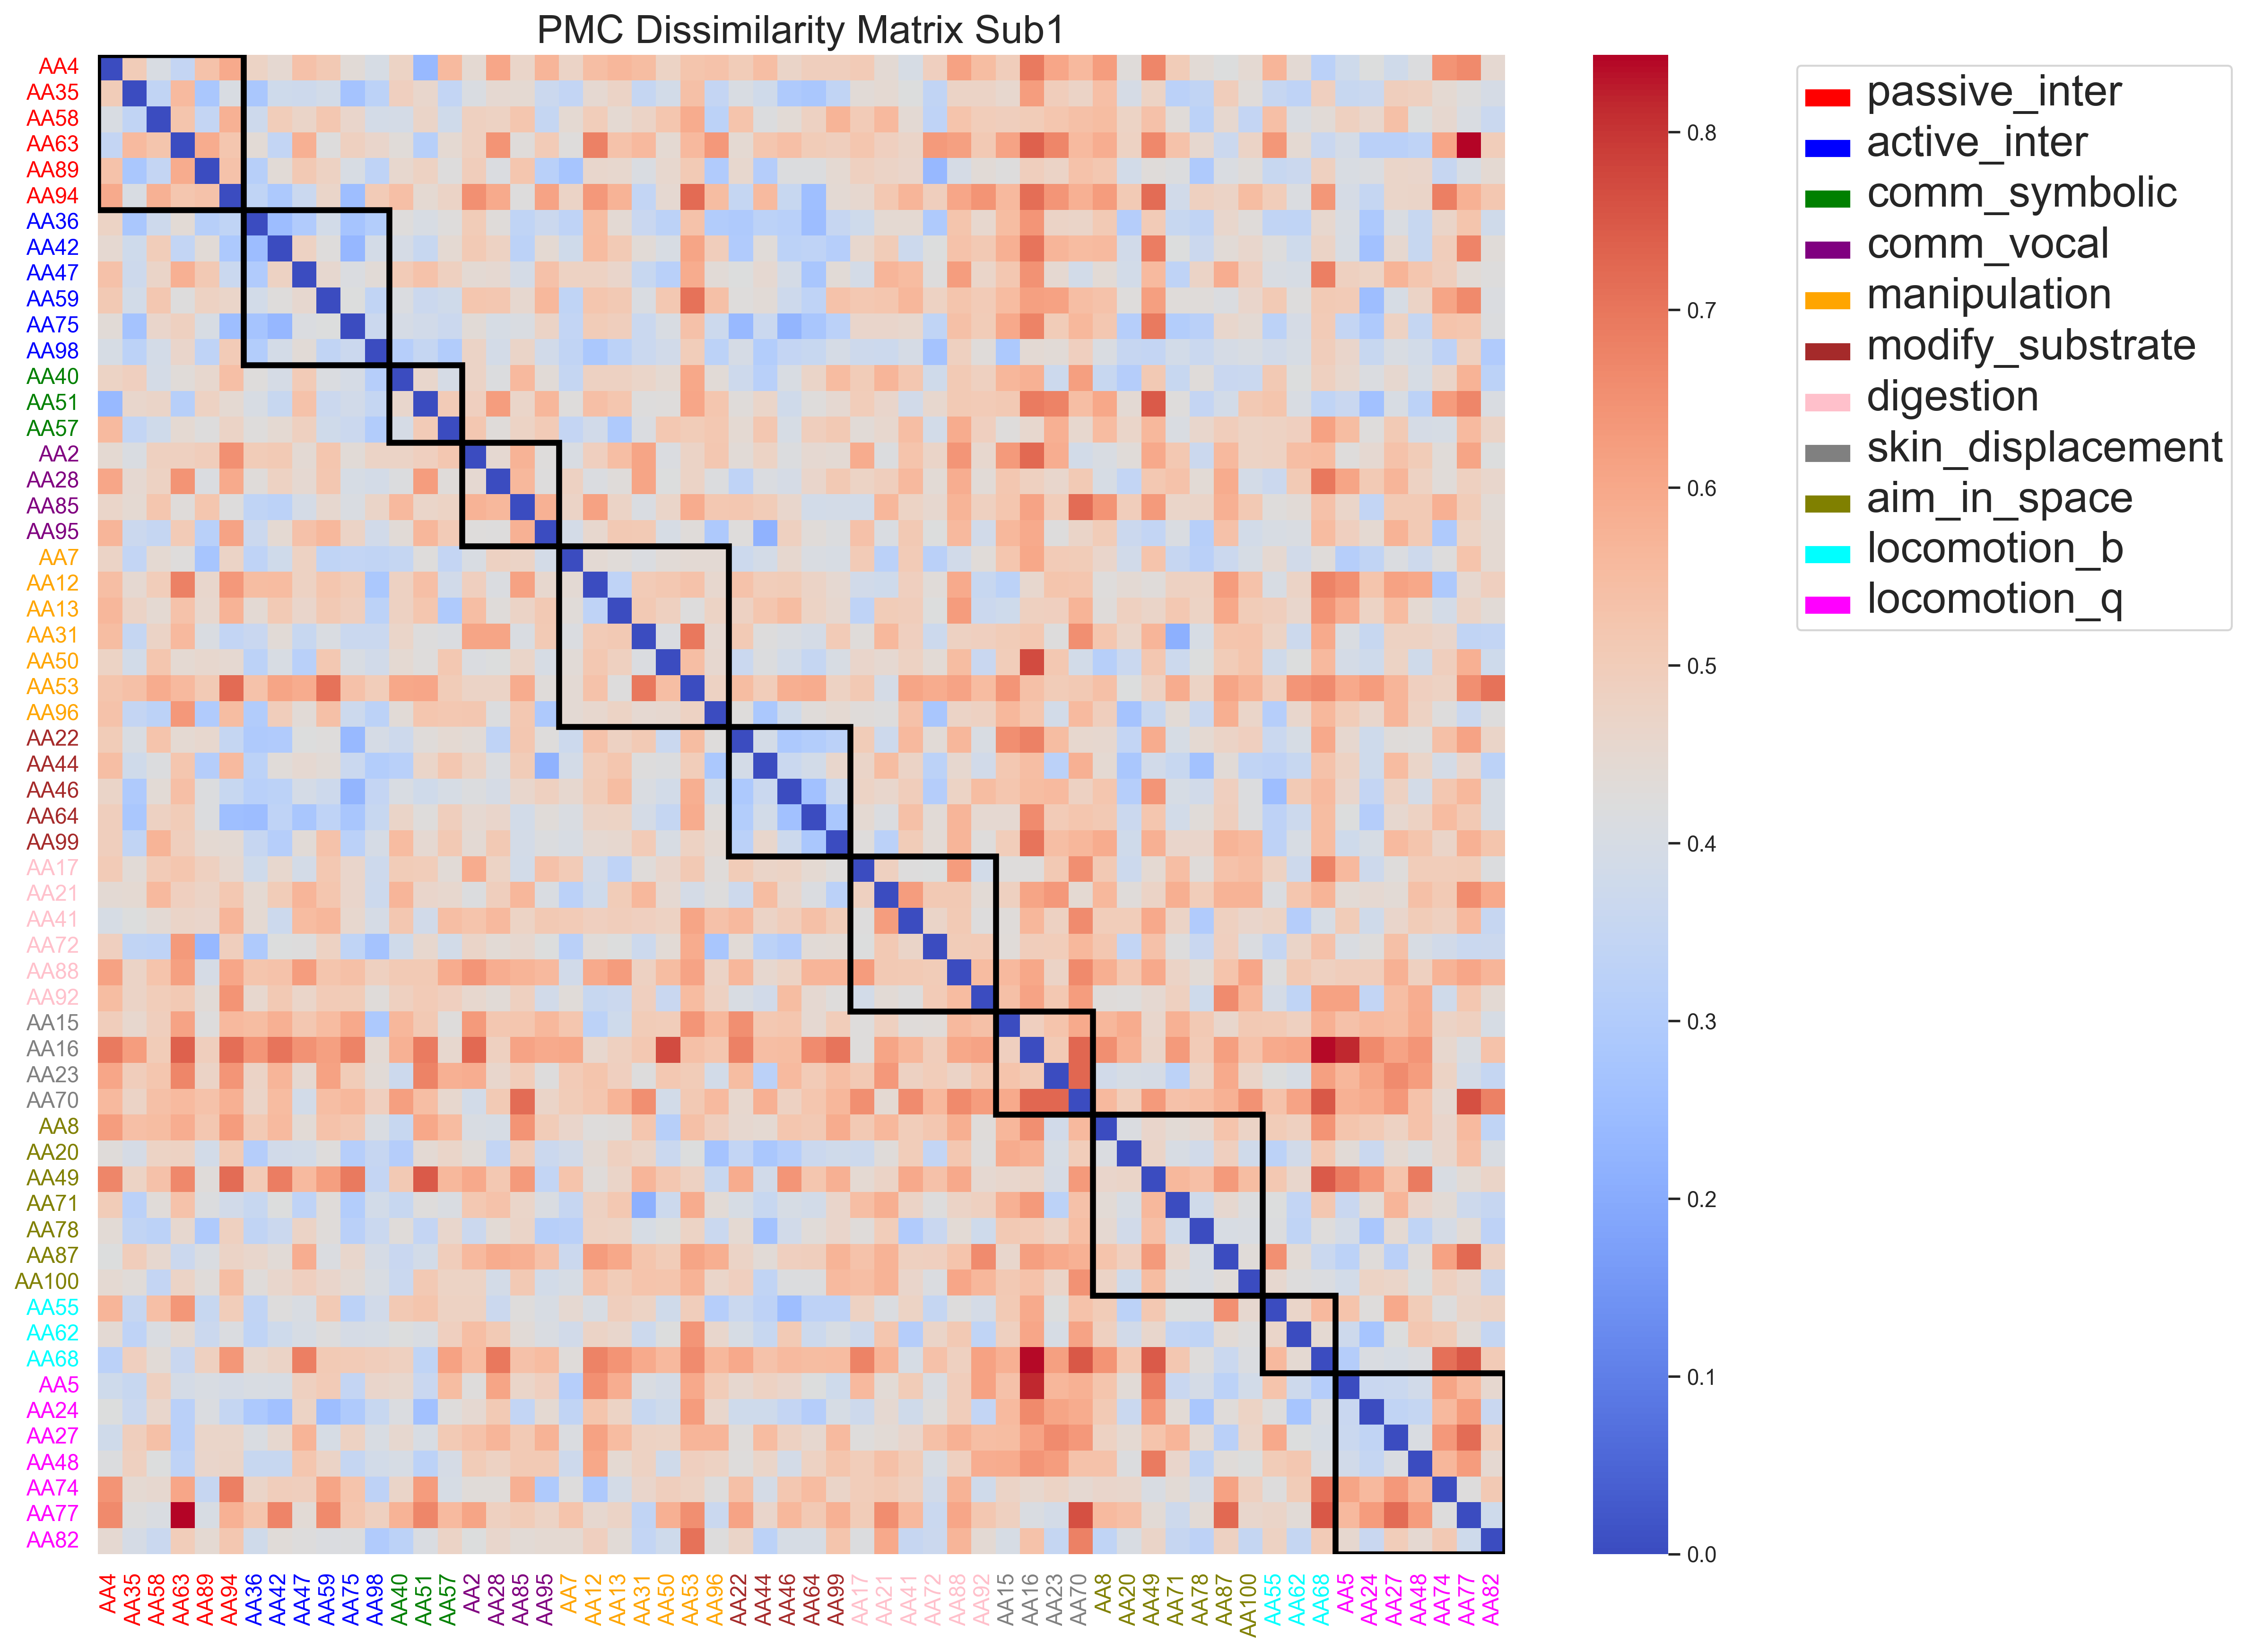

In [97]:
import matplotlib.patches as mpatches

def generate_heatmap(scaled_df, groups, title):
    scaled_df.index = scaled_df.index.map(str).map('A{}'.format)
    scaled_df.columns = scaled_df.columns.map(str).map('A{}'.format)  
    plt.figure(figsize=(16, 14))
    heatmap=sns.heatmap(scaled_df, cmap='coolwarm')
    plt.title(title, fontsize=20)  # Add title here
    yticks = heatmap.get_yticklabels()
    xticks=heatmap.get_xticklabels()
    colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta']
    start = 0
    for j,(group_name,indexes) in enumerate(groups):
        end = start + len(indexes)
        for i in range(start,end):
            yticks[i].set_color(colors[j])
            xticks[i].set_color(colors[j])
        # Add a rectangle for the group
        heatmap.add_patch(plt.Rectangle((start, start), end-start, end-start, fill=False, edgecolor='black', lw=3))
        start = end
    heatmap.set_yticklabels(yticks)
    patches = [mpatches.Patch(color=colors[i], label=name) for i,(name,indexes) in enumerate(groups)]
    legend = plt.legend(handles=patches,bbox_to_anchor=(1.20,1), loc=2)
    plt.setp(legend.get_texts(), fontsize='large') 
    plt.show()


# Apply the function to each DSM with the correct title
generate_heatmap(ppc_dissim, groups, "PPC Dissimilarity Matrix Sub1")
generate_heatmap(lotc_dissim, groups, "LOTC Dissimilarity Matrix Sub1")
generate_heatmap(pmc_dissim, groups, "PMC Dissimilarity Matrix Sub1")